<a href="https://colab.research.google.com/github/nadyapurba/ArtiFact/blob/main/Capstone_Bangkit_ArtiFact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import os
import random
from matplotlib import pyplot as plt
import cv2

import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

import keras_tuner as kt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art

Dataset URL: https://www.kaggle.com/datasets/ravidussilva/real-ai-art
License(s): other
100% 9.94G/9.95G [02:24<00:00, 137MB/s] 
100% 9.95G/9.95G [02:24<00:00, 74.1MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("real-ai-art.zip", "r") as zip_ref:
    zip_ref.extractall("data")

In [ ]:
!ls data

Real_AI_SD_LD_Dataset


In [ ]:
top_dir = '/content/data/Real_AI_SD_LD_Dataset'

train_dir = os.path.join(top_dir, 'train')

all_directories = os.listdir(train_dir)

train_human = []
train_ai = []

for directory in all_directories:
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    else:
        train_ai.append(os.path.join(train_dir, directory))

print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. /content/data/Real_AI_SD_LD_Dataset/train/art_nouveau
1. /content/data/Real_AI_SD_LD_Dataset/train/impressionism
2. /content/data/Real_AI_SD_LD_Dataset/train/baroque
3. /content/data/Real_AI_SD_LD_Dataset/train/surrealism
4. /content/data/Real_AI_SD_LD_Dataset/train/expressionism
5. /content/data/Real_AI_SD_LD_Dataset/train/romanticism
6. /content/data/Real_AI_SD_LD_Dataset/train/ukiyo_e
7. /content/data/Real_AI_SD_LD_Dataset/train/realism
8. /content/data/Real_AI_SD_LD_Dataset/train/renaissance
9. /content/data/Real_AI_SD_LD_Dataset/train/post_impressionism

Train directories containing AI-generated images:
0. /content/data/Real_AI_SD_LD_Dataset/train/AI_SD_baroque
1. /content/data/Real_AI_SD_LD_Dataset/train/AI_LD_ukiyo-e
2. /content/data/Real_AI_SD_LD_Dataset/train/AI_SD_realism
3. /content/data/Real_AI_SD_LD_Dataset/train/AI_SD_romanticism
4. /content/data/Real_AI_SD_LD_Dataset/train/AI_SD_surrealism
5. /content/data/Real_AI_SD_LD

In [ ]:
test_dir = os.path.join(top_dir, 'test')

all_directories = os.listdir(test_dir)

test_human = []
test_ai = []

for directory in all_directories:
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    else:
        test_ai.append(os.path.join(test_dir, directory))

print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. /content/data/Real_AI_SD_LD_Dataset/test/art_nouveau
1. /content/data/Real_AI_SD_LD_Dataset/test/impressionism
2. /content/data/Real_AI_SD_LD_Dataset/test/baroque
3. /content/data/Real_AI_SD_LD_Dataset/test/surrealism
4. /content/data/Real_AI_SD_LD_Dataset/test/expressionism
5. /content/data/Real_AI_SD_LD_Dataset/test/romanticism
6. /content/data/Real_AI_SD_LD_Dataset/test/ukiyo_e
7. /content/data/Real_AI_SD_LD_Dataset/test/realism
8. /content/data/Real_AI_SD_LD_Dataset/test/renaissance
9. /content/data/Real_AI_SD_LD_Dataset/test/post_impressionism

Test directories containing AI-generated images:
0. /content/data/Real_AI_SD_LD_Dataset/test/AI_SD_baroque
1. /content/data/Real_AI_SD_LD_Dataset/test/AI_LD_ukiyo-e
2. /content/data/Real_AI_SD_LD_Dataset/test/AI_SD_realism
3. /content/data/Real_AI_SD_LD_Dataset/test/AI_SD_romanticism
4. /content/data/Real_AI_SD_LD_Dataset/test/AI_SD_surrealism
5. /content/data/Real_AI_SD_LD_Dataset/test/AI_

In [ ]:
def plot_im(directory, k):
    files = os.listdir(directory)
    im = random.choices(files, k=k)

    fig = plt.figure()

    for i in range(k):
        im_i_path = os.path.join(directory, im[i])
        im_i = cv2.imread(im_i_path)

        ax = fig.add_subplot(int(np.sqrt(k)), int(np.sqrt(k)), i + 1)

        ax.imshow(im_i)
        ax.axis('off')

        ax.set_title(im[i], fontsize=8, pad=2)

    plt.tight_layout()
    plt.show()

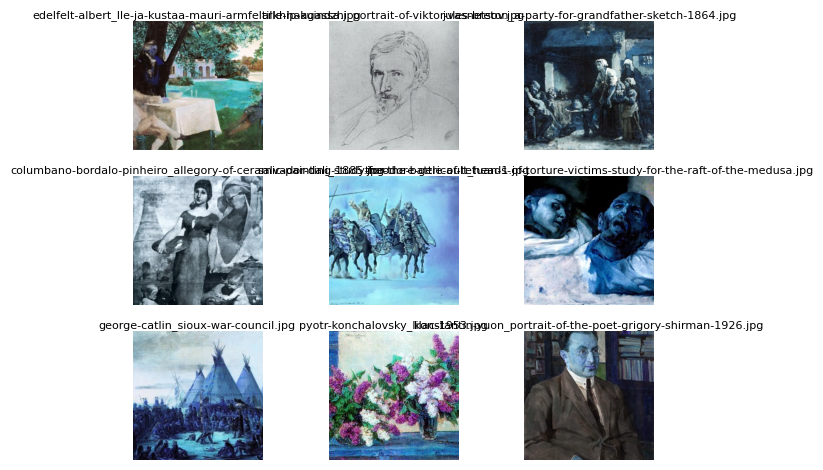

In [ ]:
real_im = plot_im(directory=train_human[7], k=9)
plt.show()

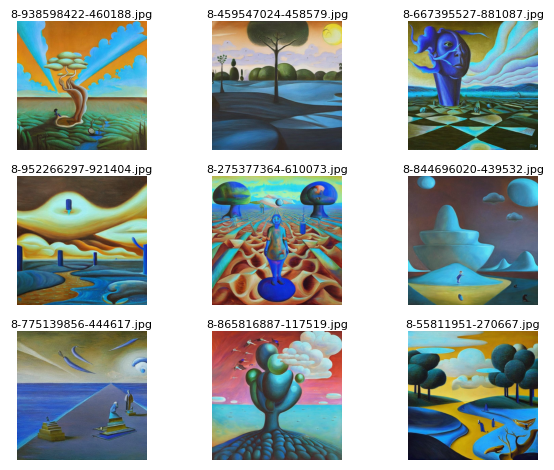

In [ ]:
ai_im = plot_im(directory=train_ai[4], k=9)
plt.show()

# Labelling #

In [ ]:
filepaths = []
labels = []

train_data = pd.DataFrame(columns=['filepath', 'label'])

for directory in train_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

for directory in train_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

data = pd.DataFrame({'filepath': filepaths, 'label': labels})
train_data = pd.concat([train_data, data], ignore_index=True)

In [ ]:
train_data.head()

,filepath,label
0,/content/data/Real_AI_SD_LD_Dataset/train/art_...,human
1,/content/data/Real_AI_SD_LD_Dataset/train/art_...,human
2,/content/data/Real_AI_SD_LD_Dataset/train/art_...,human
3,/content/data/Real_AI_SD_LD_Dataset/train/art_...,human
4,/content/data/Real_AI_SD_LD_Dataset/train/art_...,human


In [ ]:
file_counts = train_data['label'].value_counts()

print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       105015
human     50000
Name: count, dtype: int64


# Reduce AI data for balancing #

In [ ]:
random_seed = 123
np.random.seed(random_seed)

num_to_drop = 55015

ai_indices = train_data[train_data['label'] == 'AI'].index

indices_to_drop = np.random.choice(ai_indices, num_to_drop, replace=False)

train_data = train_data.drop(indices_to_drop)

train_data.reset_index(drop=True, inplace=True)

In [ ]:
print(train_data.head())

file_counts = train_data['label'].value_counts()

print("\nNumber of files under each label:")
file_counts

                                            filepath  label
0  /content/data/Real_AI_SD_LD_Dataset/train/art_...  human
1  /content/data/Real_AI_SD_LD_Dataset/train/art_...  human
2  /content/data/Real_AI_SD_LD_Dataset/train/art_...  human
3  /content/data/Real_AI_SD_LD_Dataset/train/art_...  human
4  /content/data/Real_AI_SD_LD_Dataset/train/art_...  human

Number of files under each label:


,count
label,
human,50000
AI,50000


# Label test #

In [ ]:
filepaths = []
labels = []

test_data = pd.DataFrame(columns=['filepath', 'label'])

for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

data = pd.DataFrame({'filepath': filepaths, 'label': labels})

test_data = pd.concat([test_data, data], ignore_index=True)

In [ ]:
print(test_data.head())

file_counts = test_data['label'].value_counts()

print("\nNumber of files under each label:")
file_counts

                                            filepath  label
0  /content/data/Real_AI_SD_LD_Dataset/test/art_n...  human
1  /content/data/Real_AI_SD_LD_Dataset/test/art_n...  human
2  /content/data/Real_AI_SD_LD_Dataset/test/art_n...  human
3  /content/data/Real_AI_SD_LD_Dataset/test/art_n...  human
4  /content/data/Real_AI_SD_LD_Dataset/test/art_n...  human

Number of files under each label:


,count
label,
AI,20000
human,10000


# Create train set #

In [ ]:
training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',
    y_col='label',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 100000 validated image filenames belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'AI': 0, 'human': 1}

# Create test set #

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (32, 32),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'categorical',
                                                    shuffle = False)   # to associate the prediction with expected output

test_dataset.class_indices

Found 30000 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

# Build NN #

In [ ]:
network = Sequential()
network.add(Conv2D(filters = 64, kernel_size = 3, input_shape = (32,32,3), activation='relu'))
network.add(MaxPooling2D())
network.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
network.add(MaxPooling2D())
network.add(Flatten())
network.add(Dense(units = 64, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,370 (728.01 KB)

 Trainable params: 186,370 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train NN #

In [ ]:
import time

epochs = 15

total_training_time = 0

while True:
    start_time = time.time()

    history = network.fit(train_dataset, epochs=epochs, validation_data=test_dataset, callbacks=[model_checkpoint])

    training_time = time.time() - start_time
    total_training_time += training_time

    print("Total training time so far: {:.2f} seconds".format(total_training_time))

    user_input = input("Enter 'c' to continue training for more epochs, or any other key to stop: ")

    if user_input != 'c':
        break

    additional_epochs = int(input("Enter the number of additional epochs you want to train for: "))

    epochs += additional_epochs

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7871 - loss: 0.4282
Epoch 1: val_accuracy improved from -inf to 0.89890, saving model to best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 702s 447ms/step - accuracy: 0.7871 - loss: 0.4281 - val_accuracy: 0.8989 - val_loss: 0.2413
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.8935 - loss: 0.2515
Epoch 2: val_accuracy improved from 0.89890 to 0.91603, saving model to best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 630s 402ms/step - accuracy: 0.8935 - loss: 0.2515 - val_accuracy: 0.9160 - val_loss: 0.2106
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9127 - loss: 0.2119
Epoch 3: val_accuracy improved from 0.91603 to 0.92670, saving model to best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 716s 424ms/step - accuracy: 0.9127 - loss: 0.2119 - val_accuracy: 0.9267 - val_loss: 0.1843
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9205 - loss: 0.1939
Epoch 4: val_accur

# Evaluasi NN #

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

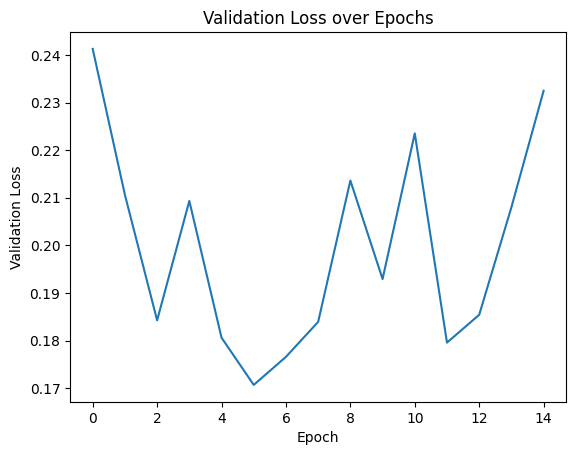

In [ ]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

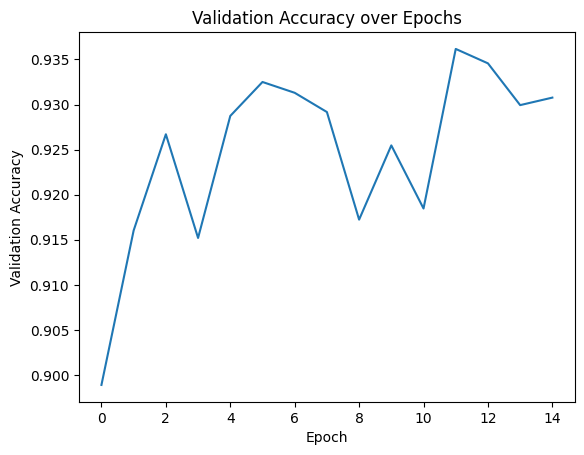

In [ ]:
plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

In [ ]:
predictions = network.predict(test_dataset)
predictions

30000/30000 ━━━━━━━━━━━━━━━━━━━━ 196s 7ms/step


array([[6.0335399e-09, 1.0000000e+00],
       [1.3606973e-02, 9.8639303e-01],
       [3.8625281e-08, 1.0000000e+00],
       ...,
       [6.6177803e-01, 3.3822197e-01],
       [9.9982882e-01, 1.7120859e-04],
       [2.4727916e-02, 9.7527212e-01]], dtype=float32)

In [ ]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [ ]:
predictions = np.argmax(predictions, axis=1)
predictions

array([1, 1, 1, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     20000
           1       0.88      0.92      0.90     10000

    accuracy                           0.93     30000
   macro avg       0.92      0.93      0.92     30000
weighted avg       0.93      0.93      0.93     30000



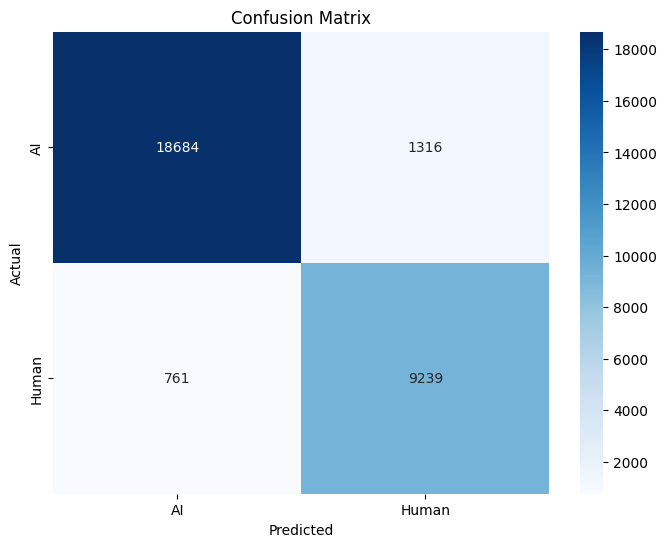

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

print(report)
plt.show()

In [ ]:
from google.colab import files
model_json = network.to_json()
with open('network.json', 'w') as json_file:
    json_file.write(model_json)

files.download('network.json')

network.save_weights('network.weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Konversi model ke format TFLite
import tensorflow as tf # Import the tensorflow module

converter = tf.lite.TFLiteConverter.from_keras_model(network)
# converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_path')

tflite_model = converter.convert()

# Simpan model TFLite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp9y71i_wv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136357058090912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136356158783728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136356158797808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136356158795872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136356159082864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136356159085328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136356159087792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136356159088672: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_details
output_details

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 17,
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
pip install pillow numpy

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np

def load_image(image_path, input_size):
    """
    Load and preprocess an image for the model.
    Args:
        image_path (str): Path to the image file.
        input_size (tuple): Expected input size for the model (height, width).
    Returns:
        np.array: Preprocessed image.
    """
    img = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB
    img = img.resize(input_size)  # Resize to model's input size
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Convert the image data to FLOAT32
    img_array = img_array.astype(np.float32)

    return img_array

def detect_image_type(image_path, model_path):
    """
    Detect whether an image is AI-generated or human-generated.
    Args:
        image_path (str): Path to the input image.
        model_path (str): Path to the TFLite model file.
    Returns:
        str: Prediction result ("AI-generated" or "Human-generated").
    """
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Preprocess the input image
    input_shape = input_details[0]['shape'][1:3]  # Height and width
    input_data = load_image(image_path, input_shape)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data)  # Get the class index

    # Map the prediction to class labels
    class_labels = ["AI-generated", "Human-generated"]
    return class_labels[prediction]

# Example usage
if __name__ == "__main__":
    image_path = '/content/0-100157086-262863.jpg'
    model_path = 'model.tflite'  # Replace with your TFLite model path
    result = detect_image_type(image_path, model_path)
    print(f"The image is: {result}")

The image is: AI-generated
